In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)
import sklearn

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Drop bmi Column
df = df.drop('bmi', axis=1)

# Drop Id Column
df = df.drop('id',axis = 1)

# Drop Residence Column
df = df.drop('Residence_type',axis=1)

# Remove rows contain gender=='Other'
df = df[df['gender'] != 'Other']

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

gender = enc.fit_transform(df['gender'])
smoking_status = enc.fit_transform(df['smoking_status'])
work_type = enc.fit_transform(df['work_type'])
ever_married = enc.fit_transform(df['ever_married'])
# Residence_type = enc.fit_transform(df['Residence_type'])

df['gender'] = gender
df['smoking_status'] = smoking_status
df['work_type'] = work_type
df['ever_married'] = ever_married
# df['Residence_type'] = Residence_type

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   avg_glucose_level  5109 non-null   float64
 7   smoking_status     5109 non-null   int64  
 8   stroke             5109 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 399.1 KB


In [19]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,1,67.0,0,1,1,2,228.69,1,1
1,0,61.0,0,0,1,3,202.21,2,1
2,1,80.0,0,1,1,2,105.92,2,1
3,0,49.0,0,0,1,2,171.23,3,1
4,0,79.0,1,0,1,3,174.12,2,1


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = df.drop('stroke', axis=1)
y = df['stroke']

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 102)


In [6]:
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=1)
X_bal, Y_bal = undersample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_bal, Y_bal, test_size=0.2, random_state=11)

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder

2022-03-25 15:52:46.857347: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-25 15:52:46.857370: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
from keras.models import load_model
model = load_model("trained_model.h5")

2022-03-25 15:52:47.874496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-25 15:52:47.874539: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-25 15:52:47.874554: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bhargav-HP-Laptop-14s-cr1xxx): /proc/driver/nvidia/version does not exist
2022-03-25 15:52:47.874739: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


On 398 samples of untrained(test) dataset:
Prediction:
[0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0
 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0
 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1
 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1]
Actual:
[0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1

Text(0.5, 1.0, 'Confusion Matrix')

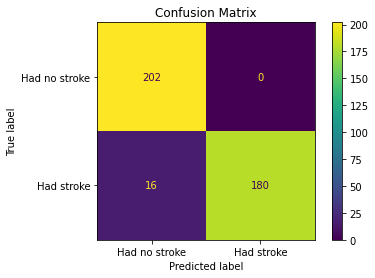

In [9]:
label_names = ["Had no stroke", "Had stroke"] # 0 patient had no stroke, 1 patient had stroke
y_actual = y_train.to_numpy()
y_pred = model.predict(X_train, verbose=0)
y_pred = np.argmax(y_pred, axis=-1)

print("On {} samples of untrained(test) dataset:".format(len(y_pred)))
print("Prediction:")
print(y_pred)
print("Actual:")
print(y_actual)

### Classification Report
print("\nClassification Report:")
print(classification_report(y_actual,y_pred, target_names=label_names))

### Confusion Matrix Graph
cm = confusion_matrix(y_true=y_actual, y_pred=y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
disp.plot()
plt.title('Confusion Matrix')

In [10]:
X_train


,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status
56,1.189791,1.051242,-0.328637,4.184599,0.723678,-0.153852,0.838320,0.581434
410,1.189791,1.228144,-0.328637,4.184599,0.723678,-0.153852,-0.538430,1.514687
364,1.189791,1.228144,3.042866,4.184599,-1.381830,-1.988224,2.446957,0.581434
405,-0.840484,0.299408,-0.328637,-0.238972,0.723678,-0.153852,-0.087905,1.514687
484,-0.840484,1.095468,-0.328637,-0.238972,0.723678,-0.153852,2.317100,-1.285072
...,...,...,...,...,...,...,...,...
337,1.189791,0.166731,-0.328637,-0.238972,0.723678,-0.153852,-0.424032,-0.351819
91,1.189791,0.210956,-0.328637,-0.238972,0.723678,-0.153852,0.170042,0.581434
80,-0.840484,0.962791,-0.328637,4.184599,0.723678,-0.153852,1.992457,-0.351819
191,-0.840484,1.581949,-0.328637,-0.238972,0.723678,-0.153852,2.398150,0.581434


In [18]:
y_pred = model.predict([[1.18791,1.051242,-0.328637,4.184599,0.723678,-0.153852,0.838320,0.581431]])
y_pred = np.argmax(y_pred, axis=-1)
y_pred[0]

0

In [21]:
import pickle
import os

scaler_path = os.path.join('/home/bhargav/College Project/Stroke_Prediction','scaler.pkl')
scaler = None
with open(scaler_path,"rb") as scaler_file:
    scaler = pickle.load(scaler_file)
    
x = [[1,67.0,0,1,1,2,228.69,1]]
x = scaler.transform(x)
y_pred = model.predict(x)
y_pred = np.argmax(y_pred, axis=-1)
y_pred[0]

1